In [1]:
%load_ext sparkmagic.magics

In [2]:
import os
from IPython import get_ipython

# set the application name as "<your_gaspar_id>-homework3"
username = os.environ['RENKU_USERNAME']
server = "http://iccluster029.iccluster.epfl.ch:8998"

get_ipython().run_cell_magic(
    'spark',
    line='config', 
    cell="""{{ "name": "{0}-final", "executorMemory": "4G", "executorCores": 4, "numExecutors": 10, "driverMemory": "4G"}}""".format(username)
)

In [3]:
get_ipython().run_line_magic(
    "spark", "add -s {0}-final -l python -u {1} -k".format(username, server)
)

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
7164,application_1652960972356_2853,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


In [4]:
%%spark
import pyspark.sql.functions as functions

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
import plotly.express as px

# Read data

In [15]:
%%spark
df = spark.read.option("header",True).csv('/user/sixu/work/data_515.csv')
df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- trip_id: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stop_sequence: string (nullable = true)
 |-- pickup_type: string (nullable = true)
 |-- drop_off_type: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- stop_id: string (nullable = true)
 |-- _c0: string (nullable = true)
 |-- stop_name: string (nullable = true)
 |-- stop_lat: string (nullable = true)
 |-- stop_lon: string (nullable = true)

In [18]:
%%spark

# cast string to float/int
df = df.withColumn('stop_lat',df['stop_lat'].cast("float"))
df = df.withColumn('stop_lon',df['stop_lon'].cast("float"))
df = df.withColumn("stop_sequence", df["stop_sequence"].cast("integer"))
df = df.drop("pickup_type","drop_off_type","year","month","day","_c0")

# sort
df = df.sort(['trip_id','stop_sequence'], ascending=True)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Plot trip

In [19]:
%%spark
df.show(10)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+--------------+-------------+------------+--------------------+---------+--------+
|             trip_id|arrival_time|departure_time|stop_sequence|     stop_id|           stop_name| stop_lat|stop_lon|
+--------------------+------------+--------------+-------------+------------+--------------------+---------+--------+
|1.TA.1-1-E-j19-1.1.H|    05:39:00|      05:39:00|           23|     8590314|Würenlos, Büntens...|47.444492|8.367304|
|1.TA.1-1-E-j19-1.1.H|    05:40:00|      05:40:00|           24|     8578679|   Würenlos, Bettlen|47.446102|8.370798|
|  1.TA.1-1-j19-1.1.H|    05:19:00|      05:19:00|            1|8503000:0:13|           Zürich HB|47.378178|8.540212|
| 1.TA.1-10-j19-1.1.R|    06:03:00|      06:03:00|            1|     8590274|Spreitenbach, Här...| 47.43128|8.367798|
| 1.TA.1-10-j19-1.1.R|    06:04:00|      06:04:00|            2|     8590272|Spreitenbach, Feg...|47.430252|8.369819|
| 1.TA.1-10-j19-1.1.R|    06:05:00|      06:05:00|      

## Define trip_id list here ↓

In [38]:
%%spark
id_list = ['1431.TA.26-215-j19-1.6.H', '1533.TA.26-215-j19-1.6.H', '1086.TA.26-215-j19-1.6.H', '1187.TA.26-215-j19-1.6.H', '1495.TA.26-215-j19-1.6.H', '1342.TA.26-215-j19-1.6.H']

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [41]:
%%spark -o selected_df
selected_df = df.filter(df.trip_id.isin(id_list))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

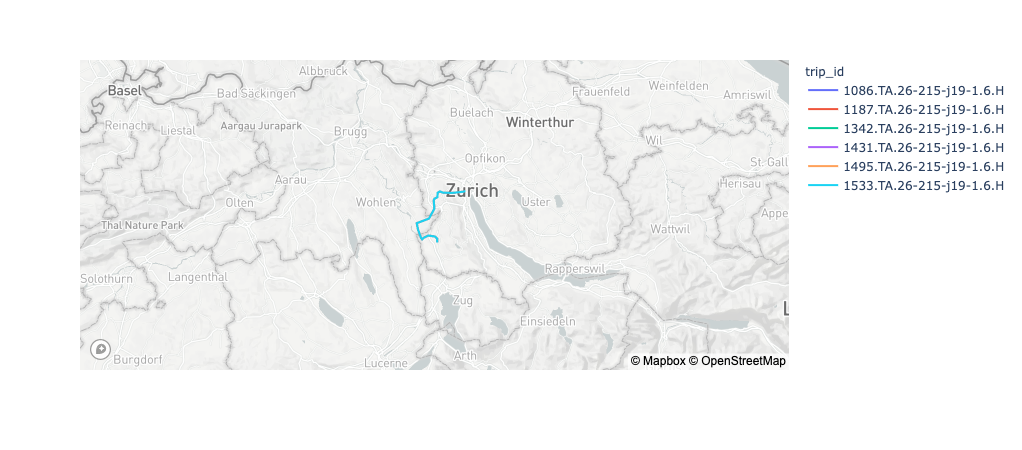

In [40]:
token = "pk.eyJ1IjoiY29jb251dG51dCIsImEiOiJjbDNscTZhbHowMmxtM2pwajl3Yjd1ejF0In0.PXbwkPmWYXrAhQsus3ypVA"
px.set_mapbox_access_token(token)
fig = px.line_mapbox(selected_df, lat="stop_lat", lon="stop_lon", color="trip_id")
fig.show()

In [54]:
%%spark
def filter_trips(id_list):
    selected_df = df.filter(df.trip_id.isin(id_list))
    return selected_df

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
'function' object has no attribute 'toJSON'
Traceback (most recent call last):
AttributeError: 'function' object has no attribute 'toJSON'



In [53]:
id_list = ['1431.TA.26-215-j19-1.6.H', '1533.TA.26-215-j19-1.6.H', '1086.TA.26-215-j19-1.6.H', '1187.TA.26-215-j19-1.6.H', '1495.TA.26-215-j19-1.6.H', '1342.TA.26-215-j19-1.6.H']
test = filter_trips(id_list)

NameError: name 'df' is not defined

In [44]:
import plotly
from plotly.graph_objs import graph_objs as go
from ipywidgets import interact

def view_image(stop_name):
    token = "pk.eyJ1IjoiY29jb251dG51dCIsImEiOiJjbDNscTZhbHowMmxtM2pwajl3Yjd1ejF0In0.PXbwkPmWYXrAhQsus3ypVA"
    px.set_mapbox_access_token(token)
    fig = px.line_mapbox(selected_df, lat="stop_lat", lon="stop_lon", color="trip_id")
    fig.show()

#     x_data = [1,2,3]
#     x1 = [i+w for i in x_data]
#     fig1 = go.Scatter(x=x1,y=[4,5,6])
#     fig2 = go.Scatter(x=x_data,y=[4,5,6])
#     iplot([fig1,fig2])
    
interact(view_image, stop_name = '')

interactive(children=(Text(value='', description='stop_name'), Output()), _dom_classes=('widget-interact',))

<function __main__.view_image(stop_name)>